In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
df= pd.read_csv('youtubetoxic.csv')
df.head(2)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [8]:
print(df.dtypes)

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object


In [9]:
print(df.isnull().sum())

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64


In [10]:
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]

In [11]:
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

Duplicate rows based on 'Text' column:
                      CommentId      VideoId           Text  IsToxic  \
592        UgiXm5jxvkdIxHgCoAEC  cT14IbTDW2c  RUN THEM OVER     True   
642  Ugxen2QgJYhNiRrMegR4AaABAg  cT14IbTDW2c  run them over     True   
657  UgxXtUmfp0rdwXB8qld4AaABAg  cT14IbTDW2c  run them over     True   
677  UgyjhPsMlWKlFNmG-h94AaABAg  cT14IbTDW2c  run them over     True   
699  UgzFZGnqcjZcW7wejI54AaABAg  cT14IbTDW2c  RUN THEM OVER     True   

     IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
592       True     False           True      False         False     False   
642       True      True          False      False         False     False   
657       True     False           True      False         False     False   
677       True     False           True      False         False     False   
699       True     False           True      False         False     False   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate

In [12]:
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

In [13]:
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 997


In [14]:
df.reset_index(drop=True, inplace=True)

In [16]:
toxic_distribution = df['IsToxic'].value_counts()
print(toxic_distribution)

IsToxic
False    538
True     459
Name: count, dtype: int64


In [17]:
df.to_csv("Toxic_Comments_dataset.csv")

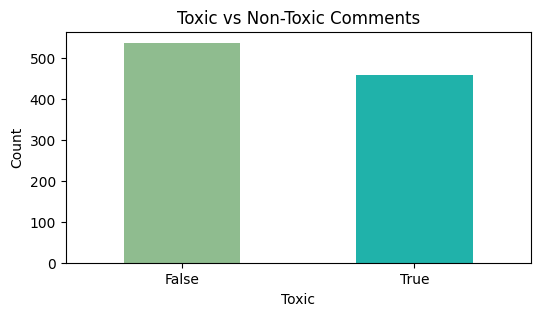

In [24]:
plt.figure(figsize=(6, 3))
toxic_counts = df['IsToxic'].value_counts()
toxic_counts.plot(kind='bar', color=['darkseagreen', 'lightseagreen'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

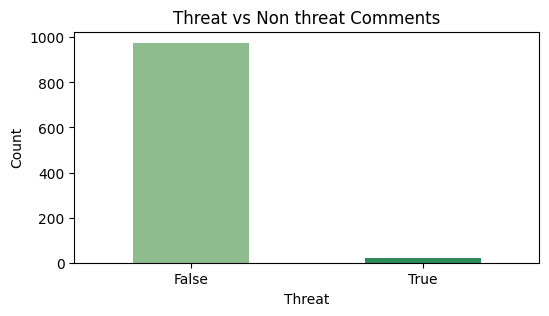

In [28]:
plt.figure(figsize=(6, 3))
toxic_counts = df['IsThreat'].value_counts()
toxic_counts.plot(kind='bar', color=['darkseagreen', 'seagreen'])
plt.title('Threat vs Non threat Comments')
plt.xlabel('Threat')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

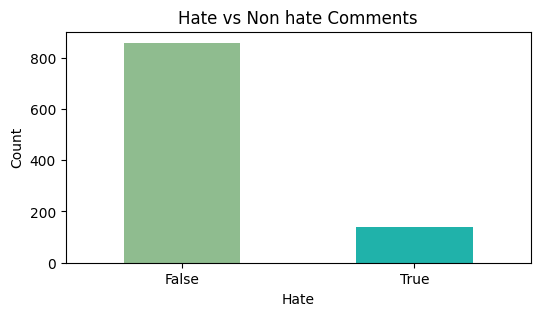

In [27]:
plt.figure(figsize=(6, 3))
toxic_counts = df['IsHatespeech'].value_counts()
toxic_counts.plot(kind='bar', color=['darkseagreen', 'lightseagreen'])
plt.title('Hate vs Non hate Comments')
plt.xlabel('Hate')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Word clouds for each comment type

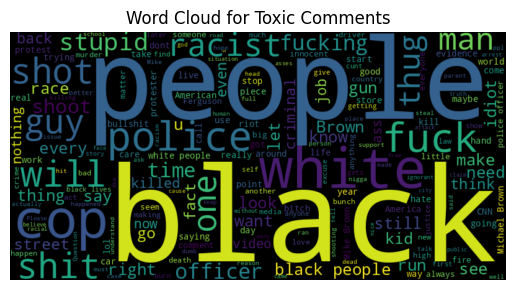

In [31]:
toxic_comments = ' '.join(df[df['IsToxic']]['Text'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

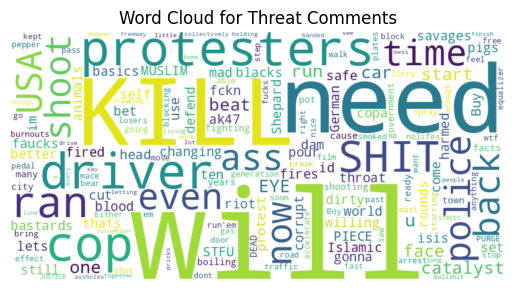

In [34]:
threat_comments = ' '.join(df[df['IsThreat']]['Text'])
wordcloud_threat = WordCloud(width=800, height=400, background_color='white').generate(threat_comments)
plt.imshow(wordcloud_threat, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Threat Comments')
plt.show()

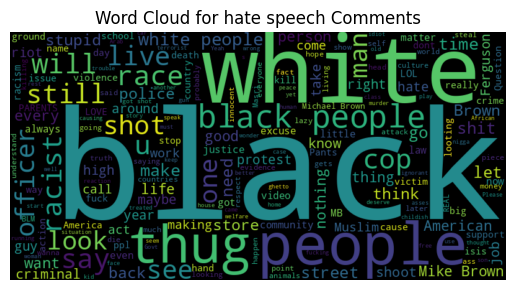

In [37]:
hate_comments = ' '.join(df[df['IsHatespeech']]['Text'])
wordcloud_hate = WordCloud(width=800, height=400, background_color='black').generate(hate_comments)
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for hate speech Comments')
plt.show()

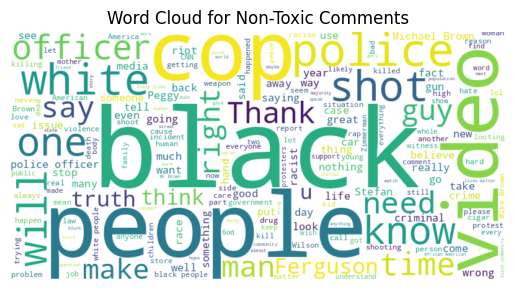

In [40]:
# non toxic comments

non_toxic_comments = ' '.join(df[~df['IsToxic']]['Text'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

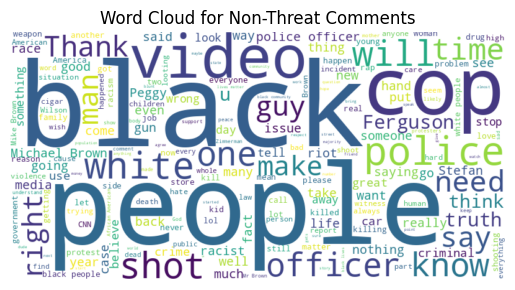

In [41]:
# non threat
non_threat_comments = ' '.join(df[~df['IsThreat']]['Text'])
wordcloud_non_threat = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_threat, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Threat Comments')
plt.show()

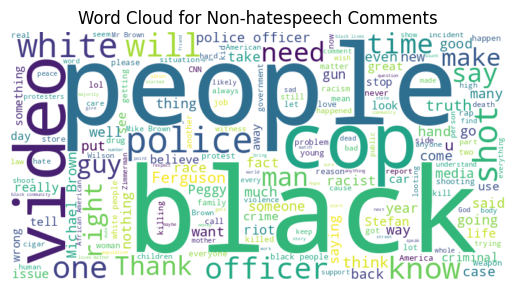

In [42]:
# non hate speech

non_hatespeech_comments = ' '.join(df[~df['IsHatespeech']]['Text'])
wordcloud_non_hatespeech = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_hatespeech, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-hatespeech Comments')
plt.show()

In [44]:
df['IsToxic'] = df['IsToxic'].astype(int)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [45]:
df['IsThreat'] = df['IsThreat'].astype(int)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [46]:
df['IsHatespeech'] = df['IsHatespeech'].astype(int)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
df['Text'] = df['Text'].map(lambda com : clean_text(com))

Vectorization

In [47]:
# Vectorize the text data using TF-IDF
vect = TfidfVectorizer(max_features=5000, stop_words='english')
X = vect.fit_transform(df['Text'])
Y = df['IsToxic']

using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE()

In [51]:
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [52]:
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['IsToxic'] = y_resampled

In [54]:
toxic_distribution_after = df_resampled['IsToxic'].value_counts()
print("Distribution after SMOTE:")
print(toxic_distribution_after)

Distribution after SMOTE:
IsToxic
0    538
1    538
Name: count, dtype: int64


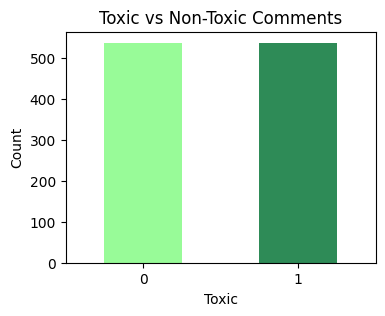

In [61]:
plt.figure(figsize=(4, 3))
toxic_counts = df_resampled['IsToxic'].value_counts()
toxic_counts.plot(kind='bar', color=['palegreen', 'seagreen'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Model training

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.23, random_state=42)

In [64]:
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [66]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(x_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
21/21 [==============================] - 1s 20ms/step - loss: 0.6735 - accuracy: 0.5997 - val_loss: 0.6489 - val_accuracy: 0.6867
Epoch 2/10
21/21 [==============================] - 0s 8ms/step - loss: 0.4455 - accuracy: 0.9003 - val_loss: 0.5847 - val_accuracy: 0.6627
Epoch 3/10
21/21 [==============================] - 0s 11ms/step - loss: 0.1811 - accuracy: 0.9637 - val_loss: 0.6339 - val_accuracy: 0.6627
Epoch 4/10
21/21 [==============================] - 0s 8ms/step - loss: 0.0696 - accuracy: 0.9879 - val_loss: 0.7454 - val_accuracy: 0.6747
Epoch 5/10
21/21 [==============================] - 0s 11ms/step - loss: 0.0357 - accuracy: 0.9940 - val_loss: 0.8172 - val_accuracy: 0.6566
Epoch 6/10
21/21 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.9985 - val_loss: 0.8642 - val_accuracy: 0.6627
Epoch 7/10
21/21 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9985 - val_loss: 0.9156 - val_accuracy: 0.6747
Epoch 8/10
21/21 

In [68]:
import matplotlib.pyplot as plt

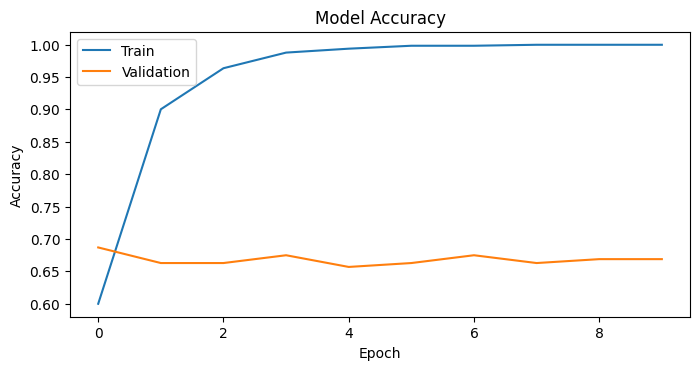

In [73]:
plt.figure(figsize=(8, 3.7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

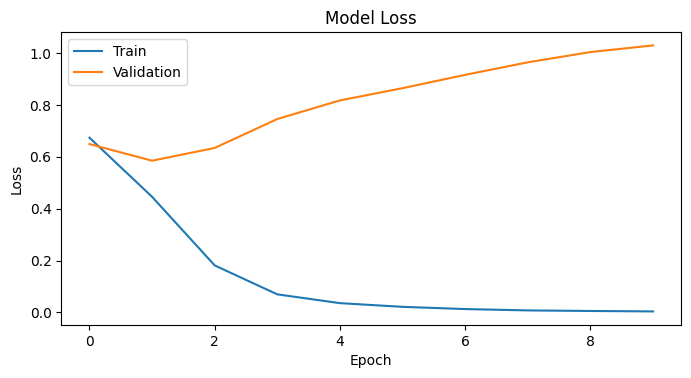

In [74]:
plt.figure(figsize=(8,3.8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()